<a href="https://colab.research.google.com/github/ejiawustl/559_final_project/blob/main/generate_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing Packages
import numpy as np
import pandas as pd
import os
import torch

In [2]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    elif torch.backends.mps.is_available():
        return torch.device("mps")
    else:
        return torch.device("cpu")

device = get_device()

print(f"Using torch device type: {device}")

Using torch device type: cuda


In [3]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [4]:
!ls ./drive/MyDrive/"perturbed images"/

'A Black Beetle.jpg'
'A Caterpillar.jpg'
'A Forest At Dawn with a Deer Hunt.jpg'
'A_Slug (1).jpg'
'A_Spider (1).jpg'
'At_Eternity'\''s_Gate (1).jpg'
'Bouquet_of_Flowers_in_a_Vase (1).jpg'
'Burning_Weeds (1).jpg'
'Christ_Asleep_during_the_Tempest (1).jpg'
'Corridor_in_the_Asylum (1).jpg'
'Cypresses (1).jpg'
'First_Steps,_after_Millet (1).jpg'
'Gardener_by_an_Apple_Tree (1).jpg'
'Irises (1).jpg'
'La_Berceuse_(Woman_Rocking_a_Cradle;_Augustine-Alix_Pellicot_Roulin,_1851–1930) (1).jpg'
'Landscape_with_a_Rainbow_over_a_Farmhouse_and_Distant_Village (1).jpg'
'L'\''Arlésienne Madame_Joseph-Michel_Ginoux_(Marie_Julien,_1848–1911) (1).jpg'
'Longcase_clock (1).jpg'
'Madame_Roulin_and_Her_Baby (1).jpg'
'Nursery_on_Schenkweg (2).jpg'
'Oleanders (1).jpg'
'Olive_Trees (1).jpg'
 Peasant_Woman_Cooking_by_a_Fireplace.jpg
 Portrait_of_a_Mother_and_Child.jpg
 Portrait_of_a_Young_Woman_with_a_Fan.jpg
 Road_in_Etten.jpg
 Roses.jpg
'Self-Portrait_with_a_Straw_Hat_(The_Potato_Peeler).jpg'
 Shoes.jpg
 Street

In [5]:
%cd /content
# remove any stale copies of diffusers
!rm -rf diffusers
# clone diffusers
!git clone https://github.com/huggingface/diffusers.git

/content
Cloning into 'diffusers'...
remote: Enumerating objects: 90315, done.
remote: Counting objects: 100% (1352/1352), done.
remote: Compressing objects: 100% (660/660), done.
remote: Total 90315 (delta 1112), reused 703 (delta 685), pack-reused 88963 (from 4)
Receiving objects: 100% (90315/90315), 67.71 MiB | 12.41 MiB/s, done.
Resolving deltas: 100% (66081/66081), done.


In [6]:
%cd /content/diffusers
# install new version of diffusers for compatibility
!pip install -e .

/content/diffusers
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.34.0.dev0-0.editable-py3-none-any.whl size=11363 sha256=ab7da20ec4763d692fb0cf85a11ce9229dce4b0ca1a72835c8a5ad425feee256
  Stored in directory: /tmp/pip-ephem-wheel-cache-xg01dt92/wheels/30/15/ca/ab6e88c89d6ba7047b3f155894c6c346e7cf06067fd132ae62
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.33.1
    Uninstalling diffusers-0.33.1:
      Successfully uninstalled diffusers-0.33.1


In [7]:
!ls /content/diffusers/examples/textual_inversion/

README.md		   test_textual_inversion_sdxl.py
README_sdxl.md		   textual_inversion_flax.py
requirements_flax.txt	   textual_inversion.py
requirements.txt	   textual_inversion_sdxl.py
test_textual_inversion.py


In [8]:
%cd /content
# upgrade accelerate, transformers, and ftfy
!pip install --upgrade accelerate transformers ftfy
# quickly accept defaults to reduce warnings
!accelerate config default

/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Un

In [9]:
# run accelerate launch to train tokens for "new artist" from perturbed images

!accelerate launch /content/diffusers/examples/textual_inversion/textual_inversion.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
  --train_data_dir="/content/drive/MyDrive/perturbed images" \
  --output_dir="/content/learned_embeddings" \
  --placeholder_token="<perturbed_style>" \
  --initializer_token="painting" \
  --learnable_property="style" \
  --resolution=512 \
  --train_batch_size=1 \
  --learning_rate=5e-4 \
  --max_train_steps=500

2025-04-29 03:54:50.094370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745898890.384255    2366 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745898890.459276    2366 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-29 03:54:51.054832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
04/29/2025 03:55:21 - INFO - __main__ - Distributed environment: DistributedType.NO
Num processes: 1
Process index: 0
Local p

In [1]:
# Runtime --> may have to restart session
# remount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/diffusers
# reinstall diffusers
!pip install -e .

%cd /content

Mounted at /content/drive
/content/diffusers
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.34.0.dev0-0.editable-py3-none-any.whl size=11363 sha256=efb24d393287d510907eec7a81ea07d1907273f31fcce0eac7658998f3ddfdba
  Stored in directory: /tmp/pip-ephem-wheel-cache-_ovdz2p1/wheels/30/15/ca/ab6e88c89d6ba7047b3f155894c6c346e7cf06067fd132ae62
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.34.0.dev0
    Uninstalling diffusers-0.34.0.dev0:
      Successfully uninstalled diffusers-0.34.0.dev0
/content


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

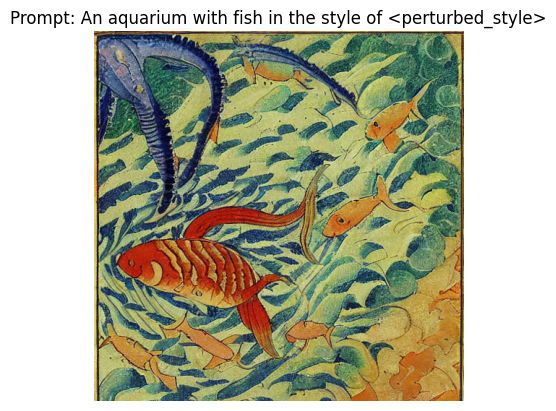

  0%|          | 0/50 [00:00<?, ?it/s]

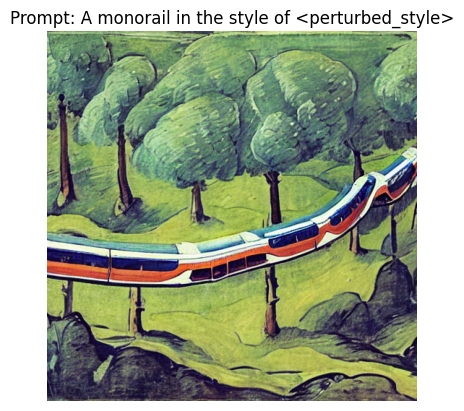

  0%|          | 0/50 [00:00<?, ?it/s]

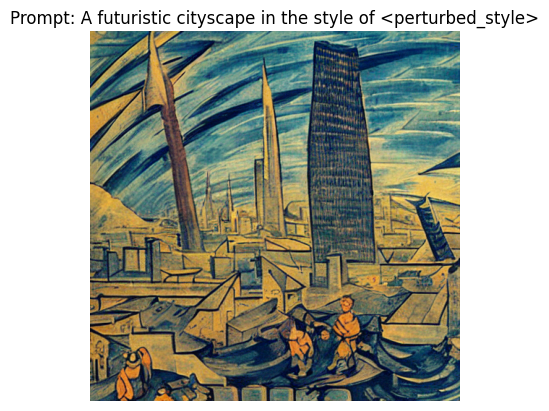

  0%|          | 0/50 [00:00<?, ?it/s]

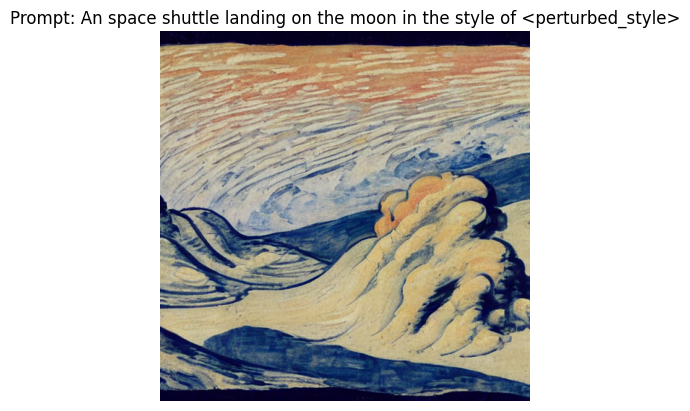

  0%|          | 0/50 [00:00<?, ?it/s]

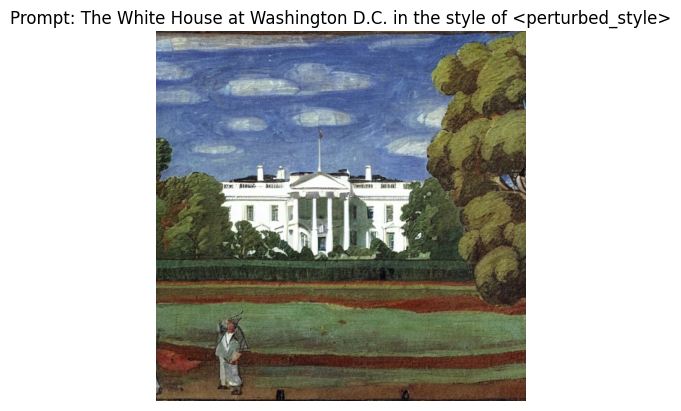

All images saved in /content/generated_perturbed_images


In [7]:
from diffusers import StableDiffusionPipeline
import torch, os
import matplotlib.pyplot as plt

# load Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16,
).to("cuda")

# load your learned embeddings (perturbed style)
pipe.load_textual_inversion(
    "./learned_embeddings",
    token="<perturbed_style>"
)

# list of prompts you want to generate
prompts = [
    "An aquarium with fish in the style of <perturbed_style>",
    "A monorail in the style of <perturbed_style>",
    "A futuristic cityscape in the style of <perturbed_style>",
    "An space shuttle landing on the moon in the style of <perturbed_style>",
    "The White House at Washington D.C. in the style of <perturbed_style>",
]

# save outputs to folder
save_folder = "/content/generated_perturbed_images"
os.makedirs(save_folder, exist_ok=True)

# generate and save each image
for i, prompt in enumerate(prompts):
    result = pipe(prompt, num_inference_steps=50, guidance_scale=7.5)
    image = result.images[0]

    # save image
    save_path = os.path.join(save_folder, f"generated_image_{i}.png")
    image.save(save_path)

    # show image
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Prompt: {prompt}")
    plt.show()

print(f"All images saved in {save_folder}")


In [17]:
import nbformat

# load the notebook
path = "/content/drive/MyDrive/Colab Notebooks/generate_image.ipynb"
nb = nbformat.read(path, as_version=nbformat.NO_CONVERT)

# remove widgets metadata
if 'widgets' in nb['metadata']:
    del nb['metadata']['widgets']

# save back
nbformat.write(nb, path)
print("Fixed notebook saved.")


Fixed notebook saved.
